# Interação e Concorrência
## Trabalho Prático - Grupo 13


Grupo:
- André Morandi A86912
- Ivo Lima A90214


In [11]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

# import visualization tools
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton

import matplotlib.pyplot as plt
%matplotlib inline

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)


Sabendo que o número do nosso grupo é $N$ = $13$

Temos de de usar um $\textit{quantum algorithm}$ para encontrar $s$ numa lista não ordenada, tal que

$$ s = N \space mod \space 8 $$

In [12]:
N = 13
s = N % 8
s

5

Passando o valor de $s$ para binário, ficamos com:

In [13]:
w = bin(s)[2:]
w # winner

'101'

Portanto, como $5$ em binário é $101$, iremos precisar de preparar um circuito quântico de 3 qubits

In [14]:
x = 3
print('Número de qubits: ', x)

Número de qubits:  3


In [57]:
qr_x      = QuantumRegister(x, 'x')
cr        = ClassicalRegister(x, 'cr')
qc_Grover = QuantumCircuit(qr_x,cr) # circuito quântico

O algoritmo adotado pelo nosso grupo foi o algoritmo de $Grover$. Este é um algoritmo de pesquisa dividido em três fases, nomeadamente $inicialização$, $oráculo$ e $amplificação$ ($diffuser$). 

Portanto, iremos inicializar todos os estados com a mesma amplitude, isto é, inicializar todos os qubits com uma $gate$ de $Hadammar$.

$$ \sum_{x_i} \lvert x_i \rangle$$

Para tal criamos a seguinte função:

In [58]:
def init(qc_Grover):
    qc_Grover.h(0)
    qc_Grover.h(1)
    qc_Grover.h(2)

### Implementação do Oracle

Para computar um $quantum$ $algorithm$ baseado em um determinada função, podemos implementar uma espécie de $black$ $box$ da função. Passamos um $input$ $x$ e recebemos um $output$ $f(x)$.


Para resolver os problemas, podemos definir o oráculo da seguinte forma: marcamos a nossa solução (ou soluções) com uma fase negativa ($-1$) para que desta forma, possamos usar o $Grover's$ $algorithm$ para resolver.

$$ U_w \lvert x \rangle \Rightarrow x \neq w \rightarrow \lvert x \rangle $$
$$ U_w \lvert x \rangle \Rightarrow x = w \rightarrow -\lvert x \rangle $$ 

Tomando o valor $w$ como sendo $101$ resultará na seguinte matriz:

$$ U_w = \begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & −1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix}$$

In [59]:
def phase_oracle(qc_Grover, qr_x):
    qc_Grover.x(qr_x[1])
    qc_Grover.h(qr_x[2])
    qc_Grover.ccx(qr_x[0], qr_x[1], qr_x[2])
    qc_Grover.x(qr_x[1])
    qc_Grover.h(qr_x[2])

Se neste momento medíssemos a base $|x>$, a superposição colapsaria, de acordo com o que nos foi explicado nas aulas ($Schrödinger's$ $cat$), tendo cada uma das bases a probabilidade de $\frac{1}{N} = \frac{1}{2^n}$ e as nossas chances de encontrar o valor $w$, $à$ $priori$, estaria entre $1$ e $2^n$. 






Aplica-se portanto a reflexão do oráculo. Esta transformação significa que a amplitude média à frente do estado de $w$ tornar-se-á negativa (foi diminuída). 



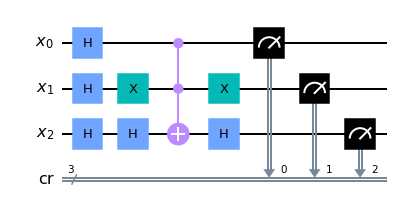

In [60]:
init(qc_Grover)

phase_oracle(qc_Grover, qr_x)
    
qc_Grover.measure(qr_x,cr)

qc_Grover.draw(output = 'mpl')

In [61]:
backend_state = Aer.get_backend('statevector_simulator') # the device to run on

In [62]:
result = execute(qc_Grover, backend_state).result()
psi1  = result.get_statevector(qc_Grover)

print(psi1)

[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j -0.+0.j  0.+0.j  0.+0.j]


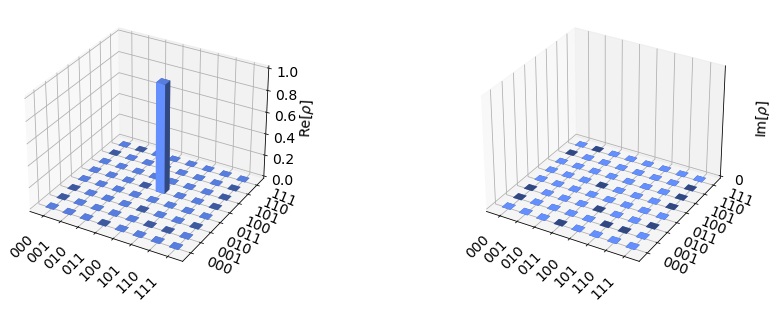

In [63]:
plot_state_city(psi1)

### Diffuser
  
O computador quântico utiliza a amplificação/$diffuser$ de modo a aumentar a probabilidade. Este processo amplifica a amplitude do $w$ diminuindo a dos outros. Fazendo com que a amplitude de $w$ se destaque relativamente às outras, tornando a probabilidade de se escolher o estado $w$ muito maior. 

In [64]:
def diffuser(qc_Grover,qr_x):
    qc_Grover.h(qr_x[0])
    qc_Grover.x(qr_x[0])
    qc_Grover.h(qr_x[1])
    qc_Grover.h(qr_x[2])
    qc_Grover.x(qr_x[1])
    qc_Grover.x(qr_x[2])
    qc_Grover.h(qr_x[2])
    qc_Grover.ccx(qr_x[0], qr_x[1], qr_x[2])
    qc_Grover.x(qr_x[0])
    qc_Grover.x(qr_x[1])
    qc_Grover.h(qr_x[2])
    qc_Grover.h(qr_x[0])
    qc_Grover.h(qr_x[1])
    qc_Grover.x(qr_x[2])
    qc_Grover.h(qr_x[2])

A fase do oráculo e do $diffuser$ terá de ser repetida aproximadamente $\sqrt{N}$ vezes para conseguirmos uma boa medição.

In [66]:
import math as math

times= round(math.sqrt(2**x))
print(times)

3


### Implementação Completa em Qiskit

O $qc\_Grover$ vai inicializar o quantum circuit

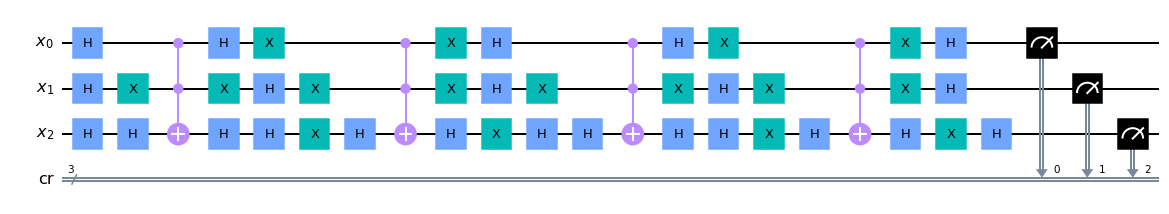

In [67]:
cr        = ClassicalRegister(x,'cr')
qc_Grover = QuantumCircuit(qr_x,cr)

init(qc_Grover)

for t in range(2):
    # phase oracle
    phase_oracle(qc_Grover, qr_x)
    # diffuser
    diffuser(qc_Grover,qr_x)
    
qc_Grover.measure(qr_x,cr)

qc_Grover.draw(output = 'mpl')

In [68]:
backend_state = Aer.get_backend('statevector_simulator') # the device to run on

In [69]:
result = execute(qc_Grover, backend_state).result()
psi2 = result.get_statevector(qc_Grover)

In [70]:
print(psi2.real)

[-0. -0. -0. -0.  0.  1.  0. -0.]


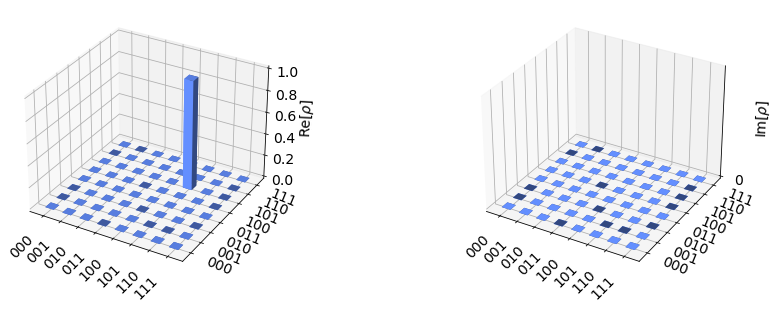

In [71]:
plot_state_city(psi2)  

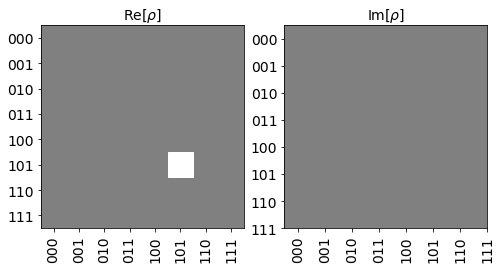

In [72]:
plot_state_hinton(psi2)

Agora iremos correr o circuito num simulador.

In [73]:
backend = Aer.get_backend("qasm_simulator")

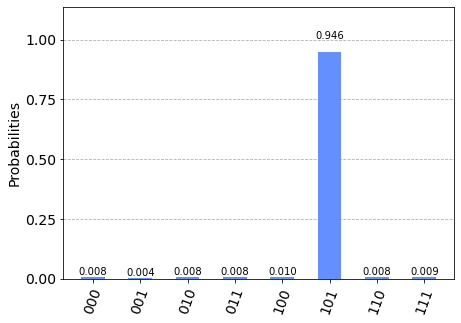

In [76]:
shots=1024
result = execute(qc_Grover, backend, shots=shots).result()
counts_sim = result.get_counts(qc_Grover)
plot_histogram(counts_sim)

Era espectável que após a execução de várias repetições tanto do oráculo como do difusor, a probabilidade de se escolher o estado $w$ fosse de 100% (numa situação ideal), uma vez que a amplitude continuaria sempre a subir. Porém, é normal que nunca se atinja esta percentagem, uma vez que os outros estados também têm amplitude, possuindo uma pequena fatia deste 100%.

In [128]:
qc_Grover.depth()

22

### Noise Simulator

In [77]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [78]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [79]:
backend_device = provider.get_backend('ibmq_16_melbourne')
print("Running on: ", backend_device)

Running on:  ibmq_16_melbourne


Nesta parte, devemos escolher o que tem o menor valor de T1 e T2, pois a chance de erros é maior uma vez que valores baixos destes atributos indicam que os qubits perdem as suas propriedades quânticas mais rapidamente

In [80]:
coupling_map = backend_device.configuration().coupling_map

In [81]:
from qiskit.providers.aer.noise import NoiseModel

In [82]:
# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(backend_device)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['sx', 'measure', 'cx', 'id', 'x']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('id', [5]), ('id', [6]), ('id', [7]), ('id', [8]), ('id', [9]), ('id', [10]), ('id', [11]), ('id', [12]), ('id', [13]), ('id', [14]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('sx', [5]), ('sx', [6]), ('sx', [7]), ('sx', [8]), ('sx', [9]), ('sx', [10]), ('sx', [11]), ('sx', [12]), ('sx', [13]), ('sx', [14]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('x', [5]), ('x', [6]), ('x', [7]), ('x', [8]), ('x', [9]), ('x', [10]), ('x', [11]), ('x', [12]), ('x', [13]), ('x', [14]), ('cx', [14, 0]), ('cx', [0, 14]), ('cx', [14, 13]), ('cx', [13, 14]), ('cx', [6, 8]), ('cx', [8, 6]), ('cx', [5, 9]), ('cx', [9, 5]), ('cx', [4, 10]), ('cx', [10, 4]), ('cx', [11, 3]), ('cx', [3, 11

In [83]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates
print(basis_gates)

['cx', 'id', 'rz', 'sx', 'x']


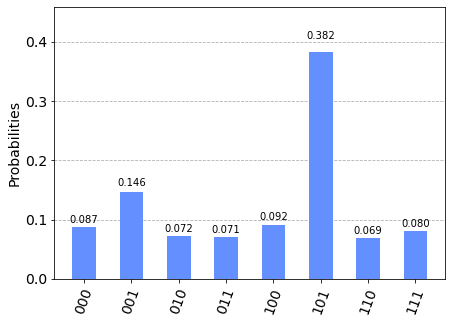

In [84]:
# Execute noisy simulation and get counts
result_noise = execute(qc_Grover, backend, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()

counts_noise = result_noise.get_counts(qc_Grover)
plot_histogram(counts_noise)

### Comparação dos Resultados

In [85]:
def resume(counts):
    s0=s1=0
    k=counts.keys()
    lk=list(k)
    for c in lk:
        if c[0]=='0':
            s0 = s0 + counts.get(c)
        else:
            s1 = s1 + counts.get(c)
    return({'0':s0, '1':s1})

In [86]:
c = resume(counts_sim)

In [87]:
c_noise = resume(counts_noise)

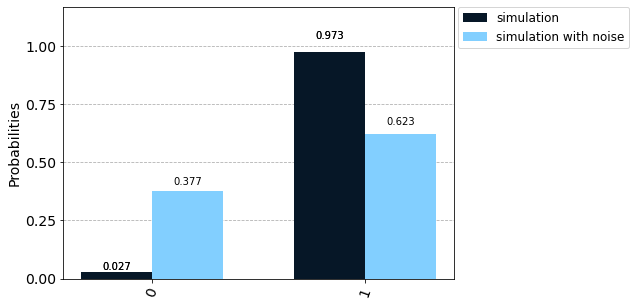

In [88]:
plot_histogram([c,c_noise], legend= ['simulation','simulation with noise'], color=['#061727','#82cfff'])

Como era expectável, podemos verificar pelo gráfico que existe uma grande quantidade de erros

### Correr num Quantum Computer 

In [17]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [90]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [19]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 5              Pending Jobs: 0
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      145.5          Avg. T1:      75.2           Avg. T1:      79.3
Avg. T2:      67.0           Avg. T2:      73.2           Avg. T2:      91.6



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 6              Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operati

Escolhemos a $ibmq\_santiago$ devido ao Avgerage $T1$ $relaxation$ $time$ e $T2$ $coherence$ $time$, pois valores baixos destes atributos indicam que os qubits perdem as suas propriedades quânticas mais rapidamente, e também por causa da quantidade de qubits superior ou igual a $3$. 

In [20]:
backend_device = provider.get_backend('ibmq_santiago')
print("Running on: ", backend_device)

Running on:  ibmq_santiago


In [22]:
backend_monitor(backend_device)

ibmq_santiago
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 5
    backend_version: 1.3.22
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    n_uchannels: 8
    supported_instructions: ['shiftf', 'measure', 'play', 'setf', 'rz', 'cx', 'u3', 'acquire', 'delay', 'id', 'reset', 'sx', 'u1', 'x', 'u2']
    coupling_map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]
    memory: True
    description: 5 qubit device
    qubit_channel_mapping: [['u0', 'm0', 'd0', 'u1'], ['m1', 'u3', 'u0', 'd1', 'u1', 'u2'], ['u4', 'm2', 'u3', 'd2', 'u5', 'u2'], ['u4', 'u6', 'm3', 'u7', 'u5', 'd3'], ['u7', 'm4', 'd4', 'u6']]
    rep_times: [0.001]
    url: None
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transforma

In [91]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [24]:
job_r = execute(qc_Grover, backend_device, shots=shots)

jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))

JOB ID: 60bb51b55f4eaa46e7dae995


In [26]:
job_get=backend_device.retrieve_job("60bb51b55f4eaa46e7dae995")

result_r = job_get.result()
counts_run = result_r.get_counts(qc_Grover)

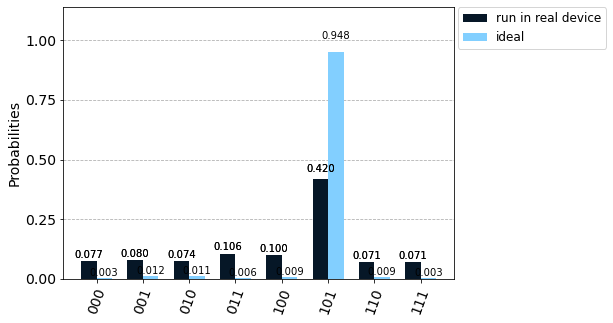

In [27]:
plot_histogram([counts_run, counts_sim ], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

Desta forma, concluímos que há uma maior chance de medir |101>. Os outros resultados ocorrem devido aos erros da computação quântica.

### IGNIS

É uma calibração usada para diminuir os erros de medição.

### Calibration Matrix

Como temos 3 qubits, precisamos de um circuito de calibração da ordem $2^3 = 8$

In [28]:
# Generate the calibration circuits
qr = QuantumRegister(x)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr, circlabel='mcal')

In [29]:
state_labels

['000', '001', '010', '011', '100', '101', '110', '111']

Num caso idealista onde não existiria barulho/erro, a matriz de calibração seria uma matriz identidade $8x8$. Mas, uma vez que estamos a aplicar num dispositvo quântico real, haverá sempre algum barulho/erro.

In [30]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=shots)

jobID_run_ignis = job_ignis.job_id()

print('JOB ID: {}'.format(jobID_run_ignis))

JOB ID: 60bb51da1eb02401eacee63d


In [31]:
job_get=backend_device.retrieve_job("60b7883fdd5b829f163c1415")

cal_results = job_get.result()

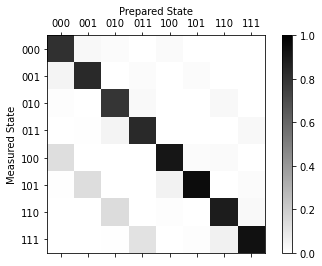

In [32]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

# Plot the calibration matrix
meas_fitter.plot_calibration()

### Análise de Resultados

A $\textit{ average assignment fidelity }$ é o traço da diagonal da matriz anterior. 

In [33]:
# Medida de fidelidade
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.868042


### Calibração

In [34]:
# Filtro
meas_filter = meas_fitter.filter

# Resultados (mitigation)
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()

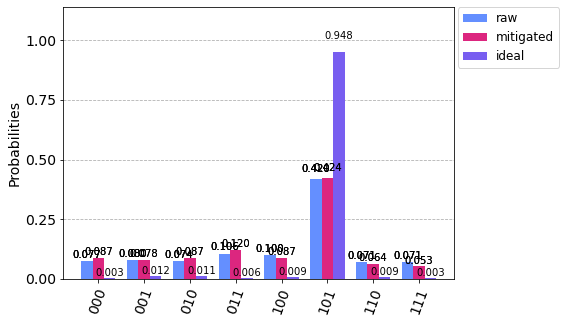

In [35]:
plot_histogram([counts_run, mitigated_counts, counts_sim], legend=['raw', 'mitigated', 'ideal'])

### Conclusão

O algoritmo de Grover é relativamente simples, umas vez que a inserção das primeiras $Hadamard$ $gates$  colocam os qubits numa situação em que o estado das suas fases tem importância. O oráculo muda-as, já o difusor reorganiza-as para que mais tarde possam ser aplicadas novamente as $Hadamard$ $gates$ para assim obter o $w$ esperado. Portanto podemos concluir que somente o oráculo é alterado e o $diffuser$ mantém-se inalterado.

Além disso, a mitigação de erros foi capaz de aumentar ligeiramente a probabilidade de ocorrência no nosso estado marcado.

### BIBLIOGRAFIA 

Para a elaboração deste trabalho, consultamos as seguintes páginas da web, para o esclarecimento de dúvidas:

- [Practical Guide](https://towardsdatascience.com/a-practical-guide-to-quantum-amplitude-amplification-dbcbe467044a)
- [Qiskit Documentation](https://qiskit.org/textbook/ch-algorithms/grover.html)
- [IBM Composer](https://quantum-computing.ibm.com/composer/files/2eca069b370b929ecbe89fb0b9b05db9)
- [Grover’s Algorithm](https://averyparkinson23.medium.com/implementing-grovers-algorithm-in-qiskit-b5ddd7dccb2f)
- [Interação e Concorrência - Página da Disciplina](http://arca.di.uminho.pt/ic-2021/)